# Loan Approval Prediction Full Notebook

# 1. Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE

# 2. Load Dataset

In [ ]:
df=pd.read_csv("/kaggle/input/loan-prediction-problem-dataset/train_u6lujuX_CVtuZ9i.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.shape

(614, 13)

In [ ]:
df.size

7982

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


# 3. Data Cleaning & Handling Missing Values

In [ ]:
print("Missing values before:\n", df.isnull().sum())

Missing values before:
 Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [ ]:
df.fillna(method='ffill',inplace=True)

In [ ]:
df.fillna(method='bfill',inplace=True)

In [ ]:
for col in df.columns:
    if df[col].dtype == "object":
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

In [ ]:
print("Missing values after:\n", df.isnull().sum())

Missing values after:
 Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


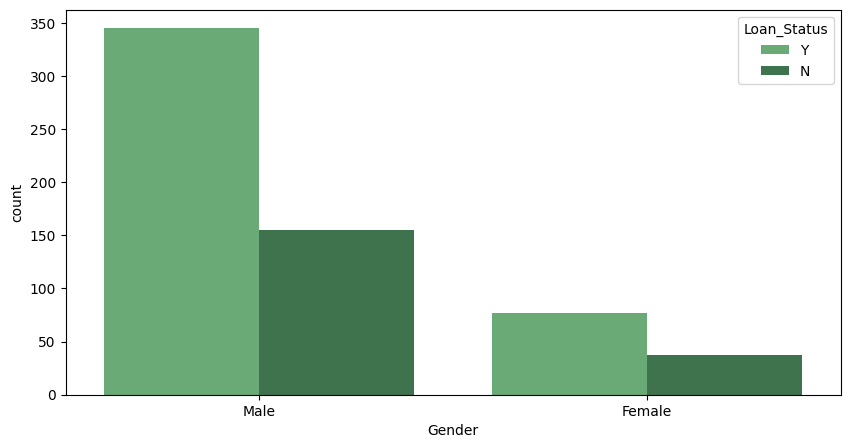

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Gender',data=df,hue='Loan_Status',palette='Greens_d')
plt.show()

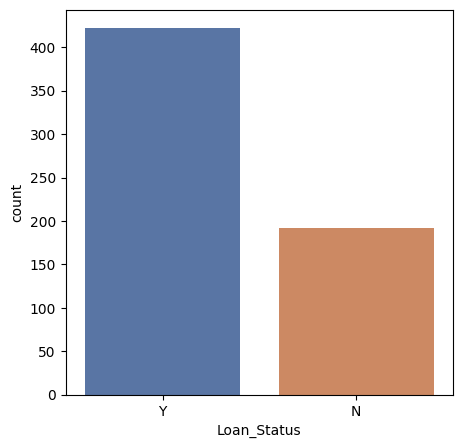

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x='Loan_Status',data=df,palette='deep')
plt.show()

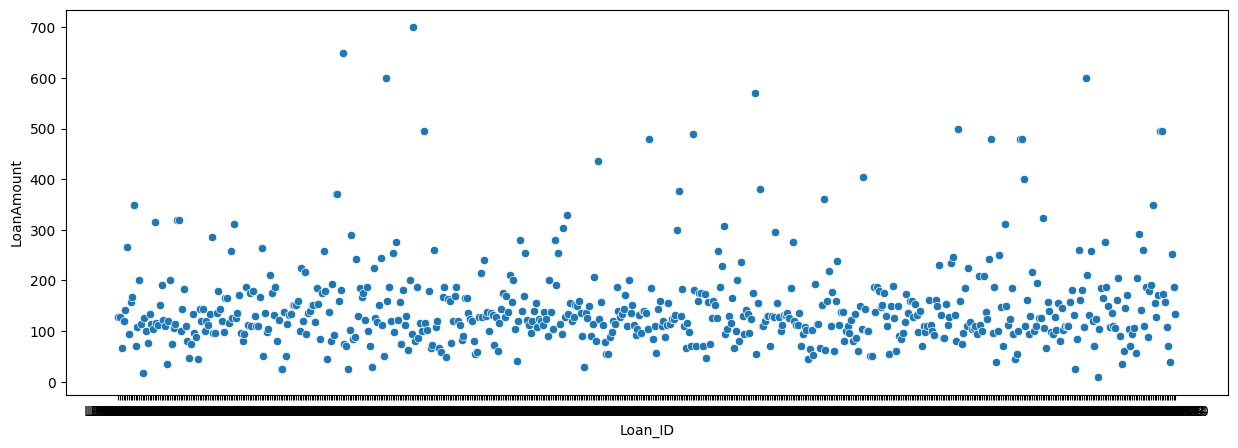

In [ ]:
plt.figure(figsize=(15,5))
sns.scatterplot(x="Loan_ID",y="LoanAmount",data=df)
plt.show()

<Figure size 1000x500 with 0 Axes>

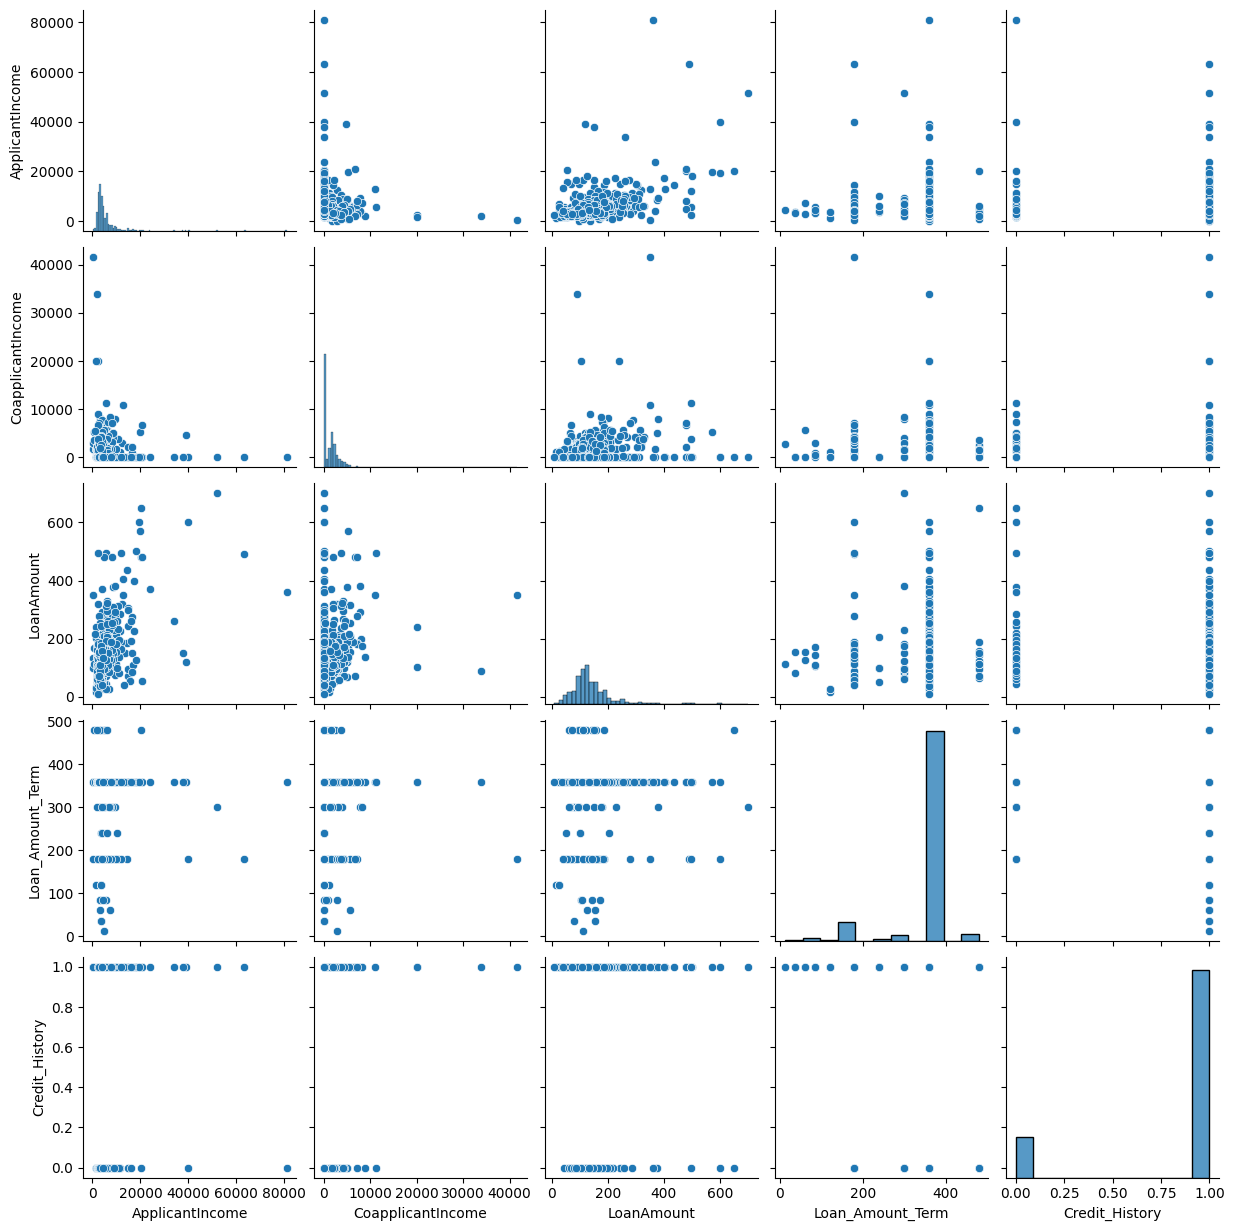

In [ ]:
plt.figure(figsize=(10,5))
sns.pairplot(df)
plt.show()

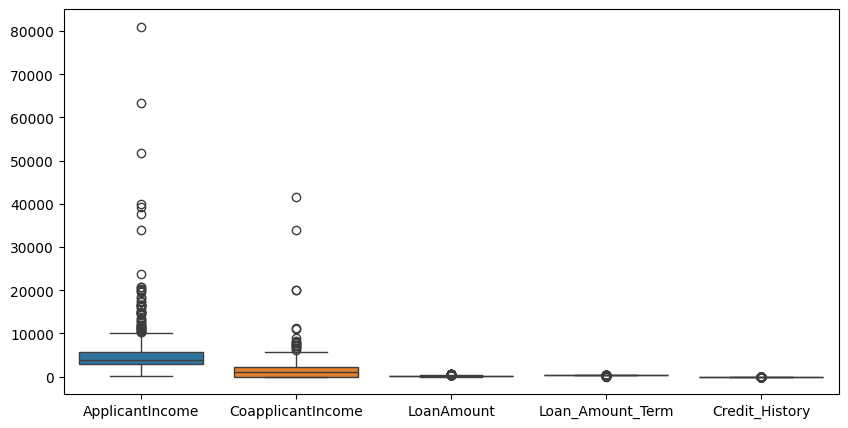

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df)
plt.show()

# 4. Drop Unnecessary Columns

In [ ]:
df.drop("Loan_ID", axis=1, inplace=True)

In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# 5. Encode Categorical Variables



In [ ]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,128.0,360.0,1.0,True,False,False,False,False,False,False,False,True,True
1,4583,1508.0,128.0,360.0,1.0,True,True,True,False,False,False,False,False,False,False
2,3000,0.0,66.0,360.0,1.0,True,True,False,False,False,False,True,False,True,True
3,2583,2358.0,120.0,360.0,1.0,True,True,False,False,False,True,False,False,True,True
4,6000,0.0,141.0,360.0,1.0,True,False,False,False,False,False,False,False,True,True


# 6. Define Features and Target

In [ ]:
X = df.drop("Loan_Status_Y", axis=1)
y = df["Loan_Status_Y"]

# 7. Train-Test Split

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 8. Handle Imbalanced Data using SMOTE

In [ ]:
sm = SMOTE(random_state=42)
xtrain_res, ytrain_res = sm.fit_resample(xtrain, ytrain)

print("Before SMOTE:", np.bincount(ytrain))
print("After SMOTE:", np.bincount(ytrain_res))

Before SMOTE: [154 337]
After SMOTE: [337 337]


# 9. Feature Scaling (for Logistic Regression)

In [ ]:
scaler = StandardScaler()
xtrain_res_scaled = scaler.fit_transform(xtrain_res)
xtest_scaled = scaler.transform(xtest)

# 10. Model Training

# Logistic Regression

In [ ]:
log_model = LogisticRegression(max_iter=1000, class_weight="balanced")
log_model.fit(xtrain_res_scaled, ytrain_res)
yp1 = log_model.predict(xtest_scaled)

# Decision Tree

In [ ]:
tree_model = DecisionTreeClassifier(random_state=42, class_weight="balanced", max_depth=5)
tree_model.fit(xtrain_res, ytrain_res)
yp2 = tree_model.predict(xtest)

# 11. Evaluation Function

In [ ]:
def evaluate_model(y_true, y_pred, model_name):
    return {
        "Model": model_name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1-Score": f1_score(y_true, y_pred),
        "ROC-AUC": roc_auc_score(y_true, y_pred)
    }

results = []
results.append(evaluate_model(ytest, yp1, "Logistic Regression"))
results.append(evaluate_model(ytest, yp2, "Decision Tree"))

results_df = pd.DataFrame(results)
print(results_df)

                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Logistic Regression  0.853659   0.838384  0.976471  0.902174  0.777709
1        Decision Tree  0.747967   0.806818  0.835294  0.820809  0.693963


# 12. Confusion Matrices

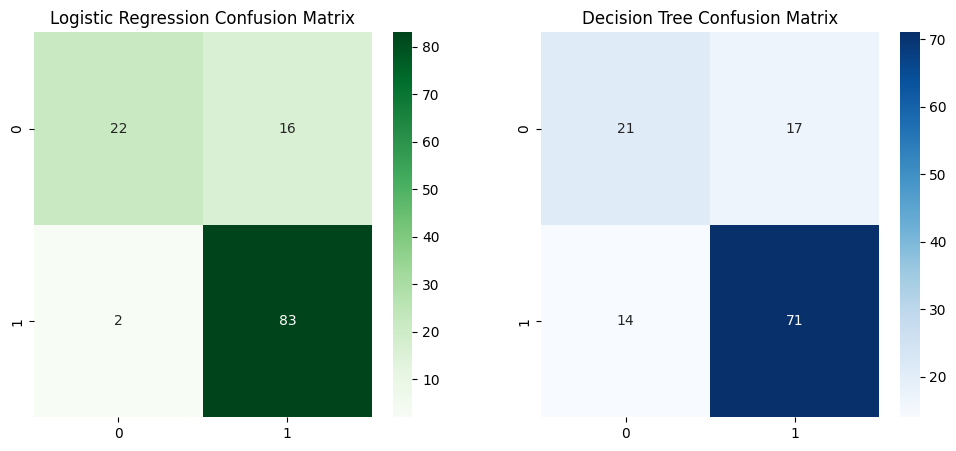

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(ytest, yp1), annot=True, fmt='d', cmap="Greens", ax=axes[0])
axes[0].set_title("Logistic Regression Confusion Matrix")

sns.heatmap(confusion_matrix(ytest, yp2), annot=True, fmt='d', cmap="Blues", ax=axes[1])
axes[1].set_title("Decision Tree Confusion Matrix")
plt.show()

# 13. ROC Curves

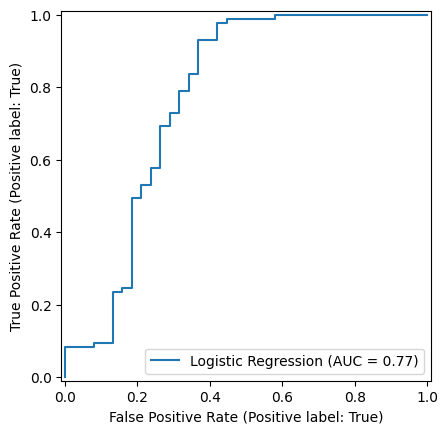

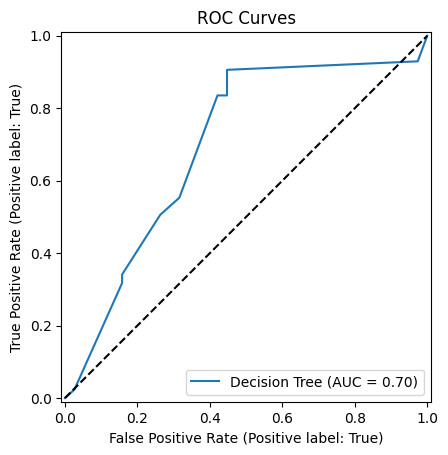

In [ ]:
RocCurveDisplay.from_estimator(log_model, xtest_scaled, ytest, name="Logistic Regression")
RocCurveDisplay.from_estimator(tree_model, xtest, ytest, name="Decision Tree")
plt.plot([0,1],[0,1],'k--')
plt.title("ROC Curves")
plt.show()

# 14. Final Comparison

In [ ]:
print("Final Model Comparison:")
print(results_df)

Final Model Comparison:
                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Logistic Regression  0.853659   0.838384  0.976471  0.902174  0.777709
1        Decision Tree  0.747967   0.806818  0.835294  0.820809  0.693963


In [ ]:
print("Logistic Regression Classification Report:\n", classification_report(ytest, yp1))
print("Decision Tree Classification Report:\n", classification_report(ytest, yp2))

Logistic Regression Classification Report:
               precision    recall  f1-score   support

       False       0.92      0.58      0.71        38
        True       0.84      0.98      0.90        85

    accuracy                           0.85       123
   macro avg       0.88      0.78      0.81       123
weighted avg       0.86      0.85      0.84       123

Decision Tree Classification Report:
               precision    recall  f1-score   support

       False       0.60      0.55      0.58        38
        True       0.81      0.84      0.82        85

    accuracy                           0.75       123
   macro avg       0.70      0.69      0.70       123
weighted avg       0.74      0.75      0.74       123



In [ ]:
best_model = results_df.sort_values(by="F1-Score", ascending=False).iloc[0]
print(f"\nBest performing model is: {best_model['Model']} with F1-Score = {best_model['F1-Score']:.4f}")


Best performing model is: Logistic Regression with F1-Score = 0.9022


In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'max_depth':[3,5,7,10], 'criterion':['gini','entropy']}
grid = GridSearchCV(DecisionTreeClassifier(random_state=42, class_weight="balanced"),
                    params, cv=5, scoring='f1')
grid.fit(xtrain_res, ytrain_res)
print("Best Decision Tree Params:", grid.best_params_)

Best Decision Tree Params: {'criterion': 'entropy', 'max_depth': 3}
